### MixUp

In [1]:
from PIL import Image
import os
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_folder = 'images/val2014/'
imgs = os.listdir(img_folder)
batch_x = [Image.open(img_folder + p).resize((224,224)) for p in imgs[10:20]]

In [3]:
def normalize_image(x):
    x = x / np.max(x)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    return (x - mean) / std

In [4]:
def denormalize_image(x):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    x = std * x + mean
    x = np.clip(x, 0, 1)
    return x

In [5]:
lam = 0.7
batch_size = len(batch_x)
current_image = normalize_image(np.array(batch_x[0]))
random_index = randint(0, batch_size - 1)
random_image_from_batch = normalize_image(np.array(batch_x[random_index]))

(-0.5, 223.5, 223.5, -0.5)

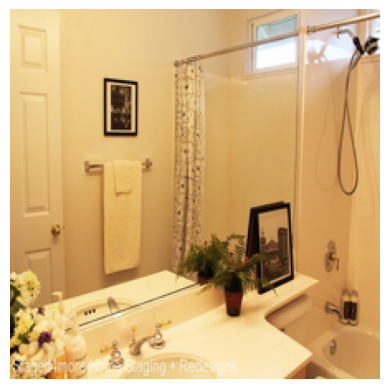

In [6]:
plt.imshow(denormalize_image(current_image))
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

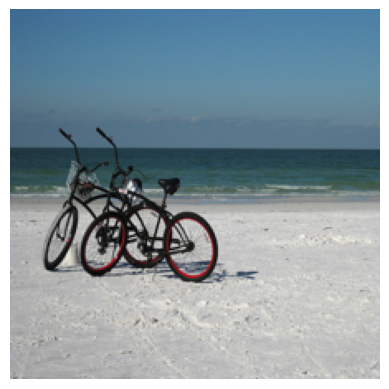

In [7]:
plt.imshow(denormalize_image(random_image_from_batch))
plt.axis("off")

In [8]:
mixed_image = lam * current_image + (1 - lam) * random_image_from_batch

(-0.5, 223.5, 223.5, -0.5)

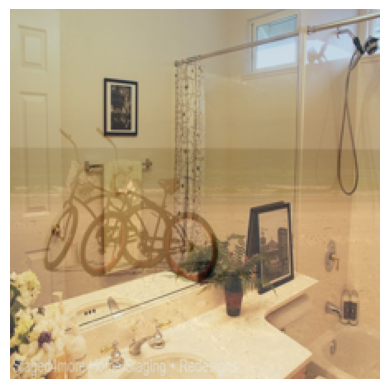

In [9]:
plt.imshow(denormalize_image(mixed_image))
plt.axis("off")

Loss = λ* XE(pred, y_a) + (1 - λ) * XE(pred, y_b)

In [ ]:
import torch
import torch.nn as nn

def mixup_data(x, y, alpha=1.0, use_cuda=True):

    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size(0)
    index = torch.randperm(batch_size)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


def forward(model, mixed_x, y_a, y_b, lam):
    criterion = nn.CrossEntropyLoss()
    pred = model(mixed_x)
    loss = lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)
    return loss